In [258]:
from requests import get
url = 'http://www.imdb.com/search/title?release_date=2017&sort=num_votes,desc&page=1'
response = get(url)

In [259]:
from bs4 import BeautifulSoup
html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)

bs4.BeautifulSoup

In [260]:
movie_containers = html_soup.find_all('div', class_ = 'lister-item mode-advanced')
print(type(movie_containers))
print(len(movie_containers))

<class 'bs4.element.ResultSet'>
50


In [261]:
# Lists to store the scraped data in
names = []
years = []
imdb_ratings = []
metascores = []
votes = []
Story = []
# Extract data from individual movie container
for container in movie_containers:
# If the movie has Metascore, then extract:
    if container.find('div', class_ = 'ratings-metascore') is not None:
          
# The name
        name = container.h3.a.text
        names.append(name)
# The year
        year = container.h3.find('span', class_ = 'lister-item-year').text
        years.append(year)
# The IMDB rating
        imdb = float(container.strong.text)
        imdb_ratings.append(imdb)
# The Metascore
        m_score = container.find('span', class_ = 'metascore').text
        metascores.append(int(m_score))
# The  number of votes
        vote = container.find('span', attrs = {'name':'nv'})['data-value']
        votes.append(int(vote))
    


In [262]:
import re

In [1]:
concepts=[]
for container in movie_containers:
     if container.find('div', class_ = 'ratings-metascore') is not None:
            for i in container.find_all('p', class_ = 'text-muted'):
                print('***********')
            concept = concepts.append(i.text.lstrip())
            #print(concepts)

NameError: name 'movie_containers' is not defined

In [264]:
print(len(concepts))
print(len(Story))
#pd.DataFrame(concepts, columns=['movie_description'])

43
0


In [265]:
concept #getting that paragraphe_Desc

In [266]:
import pandas as pd
test_df1 = pd.DataFrame({'movie': names,
'year': years,
'imdb': imdb_ratings,
'metascore': metascores,
'votes': votes,
'Movie_Desc': concepts
,})
print(test_df1.info())
test_df1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 6 columns):
movie         43 non-null object
year          43 non-null object
imdb          43 non-null float64
metascore     43 non-null int64
votes         43 non-null int64
Movie_Desc    43 non-null object
dtypes: float64(1), int64(2), object(3)
memory usage: 2.1+ KB
None


,movie,year,imdb,metascore,votes,Movie_Desc
0,Logan,(2017),8.1,77,575796,"In a future where mutants are nearly extinct, ..."
1,Thor: Ragnarok,(2017),7.9,74,507072,Thor (Chris Hemsworth) is imprisoned on the pl...
2,Guardians of the Galaxy Vol. 2,(2017),7.6,67,502025,The Guardians struggle to keep together as a t...
3,Wonder Woman,(2017),7.4,76,499724,When a pilot crashes and tells of conflict in ...
4,Dunkirk,(2017),7.9,94,479566,"Allied soldiers from Belgium, the British Empi..."
5,Star Wars: Episode VIII - The Last Jedi,(2017),7.1,85,474467,Rey develops her newly discovered abilities wi...
6,Spider-Man: Homecoming,(2017),7.5,73,450582,Peter Parker balances his life as an ordinary ...
7,Get Out,(I) (2017),7.7,84,418718,A young African-American visits his white girl...
8,Blade Runner 2049,(2017),8.0,81,390255,A young blade runner's discovery of a long-bur...
9,It,(I) (2017),7.4,69,385316,"In the summer of 1989, a group of bullied kids..."


## Topic modelling 

In [267]:
#test_df1.to_csv("IMDB.csv", index=False)

In [268]:
import pandas as pd
import numpy as np

data = pd.read_csv("IMDB.csv", sep=',')

In [269]:
data.head()

,movie,year,imdb,metascore,votes,Movie_Desc
0,Logan,(2017),8.1,77,575788,"In a future where mutants are nearly extinct, ..."
1,Thor: Ragnarok,(2017),7.9,74,507058,Thor (Chris Hemsworth) is imprisoned on the pl...
2,Guardians of the Galaxy Vol. 2,(2017),7.6,67,502008,The Guardians struggle to keep together as a t...
3,Wonder Woman,(2017),7.4,76,499708,When a pilot crashes and tells of conflict in ...
4,Dunkirk,(2017),7.9,94,479558,"Allied soldiers from Belgium, the British Empi..."


In [270]:
import copy 
print(type(data['Movie_Desc']))

original_data = copy.deepcopy(data)
print(data.keys())
print(original_data.keys())

<class 'pandas.core.series.Series'>
Index(['movie', 'year', 'imdb', 'metascore', 'votes', 'Movie_Desc'], dtype='object')
Index(['movie', 'year', 'imdb', 'metascore', 'votes', 'Movie_Desc'], dtype='object')


In [271]:
#Basic cleaning of the text data 

# 1.Convert all the data into lower case 

data['Movie_Desc'] = [text.strip().lower() for text in data['Movie_Desc']]
data['Movie_Desc'][:10]


0    in a future where mutants are nearly extinct, ...
1    thor (chris hemsworth) is imprisoned on the pl...
2    the guardians struggle to keep together as a t...
3    when a pilot crashes and tells of conflict in ...
4    allied soldiers from belgium, the british empi...
5    rey develops her newly discovered abilities wi...
6    peter parker balances his life as an ordinary ...
7    a young african-american visits his white girl...
8    a young blade runner's discovery of a long-bur...
9    in the summer of 1989, a group of bullied kids...
Name: Movie_Desc, dtype: object

In [272]:
#Read one of the line & understand the structure of the data

print(data['Movie_Desc'][1])
print(data['Movie_Desc'][5])
print(data['Movie_Desc'][6])
print(data['Movie_Desc'][15])

thor (chris hemsworth) is imprisoned on the planet sakaar, and must race against time to return to asgard and stop ragnarök, the destruction of his world, at the hands of the powerful and ruthless villain hela (cate blanchett).
rey develops her newly discovered abilities with the guidance of luke skywalker, who is unsettled by the strength of her powers. meanwhile, the resistance prepares for battle with the first order.
peter parker balances his life as an ordinary high school student in queens with his superhero alter-ego spider-man, and finds himself on the trail of a new menace prowling the skies of new york city.
aspiring musician miguel, confronted with his family's ancestral ban on music, enters the land of the dead to find his great-great-grandfather, a legendary singer.


In [273]:
#removing all the scrap 


def scrub_words(text):
    #Replace \xao characters in text
    #text = re.sub('\xa0', ' ', text)
    
    #Replace non ascii / not words and digits
    text = re.sub("(\\W|\\d)",' ',text)
    
    #Replace new line characters and following text untill space
    text = re.sub('\n(\w*?)[\s]', '', text)
    
    #Remove html markup
    text = re.sub("<.*?>", ' ', text)
    
    #Remove extra spaces from the text
    text = re.sub("\s+", ' ', text)
    return text

In [274]:
data['Movie_Desc'] = [scrub_words(text) for text in data['Movie_Desc']]
data['Movie_Desc']

0     in a future where mutants are nearly extinct a...
1     thor chris hemsworth is imprisoned on the plan...
2     the guardians struggle to keep together as a t...
3     when a pilot crashes and tells of conflict in ...
4     allied soldiers from belgium the british empir...
5     rey develops her newly discovered abilities wi...
6     peter parker balances his life as an ordinary ...
7     a young african american visits his white girl...
8     a young blade runner s discovery of a long bur...
9     in the summer of a group of bullied kids band ...
10    after being coerced into working for a crime b...
11    a mother personally challenges the local autho...
12    fueled by his restored faith in humanity and i...
13    at a top secret research facility in the s a l...
14    after returning to the criminal underworld to ...
15    aspiring musician miguel confronted with his f...
16    four teenagers are sucked into a magical video...
17    a selfish prince is cursed to become a mon

In [275]:
data = data.reset_index().to_dict(orient='list')
print(f"The keys in the dictionary are {data.keys()}")

The keys in the dictionary are dict_keys(['index', 'movie', 'year', 'imdb', 'metascore', 'votes', 'Movie_Desc'])


In [276]:
print("Data Type: ",type(original_data['Movie_Desc']))
print("Data Type: ",type(data['Movie_Desc']))

print("Length of data: ",len(original_data['Movie_Desc']))
print("Length of data: ",len(data['Movie_Desc']))

print("Original data: \n",original_data['Movie_Desc'][0])
print("\n\n**************************************************************************\n\n")
print("Clean data: \n",data['Movie_Desc'][0])

Data Type:  <class 'pandas.core.series.Series'>
Data Type:  <class 'list'>
Length of data:  43
Length of data:  43
Original data: 
 In a future where mutants are nearly extinct, an elderly and weary Logan leads a quiet life. But when Laura, a mutant child pursued by scientists, comes to him for help, he must get her to safety.


**************************************************************************


Clean data: 
 in a future where mutants are nearly extinct an elderly and weary logan leads a quiet life but when laura a mutant child pursued by scientists comes to him for help he must get her to safety 


In [277]:
#adding a new column  word_count

data['word_count'] = [len(text.split(' ')) for text in data['Movie_Desc']]
pd.DataFrame(data['word_count']).describe()

,0
count,43.000000
mean,29.372093
std,6.834866
min,15.000000
25%,24.500000
50%,29.000000
75%,33.000000
max,43.000000


In [278]:
import spacy

In [279]:
# coverting into tokens 
    
def tokenize_only(doc, remove_stopwords = True):
    
    if remove_stopwords:
        tokens = [word.text for word in doc if not word.is_stop]
    else:
        tokens = [word.text for word in doc]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [280]:
data.keys()

dict_keys(['index', 'movie', 'year', 'imdb', 'metascore', 'votes', 'Movie_Desc', 'word_count'])

In [281]:

data['only_tokens'] = []
data['all_tokens']  = []

In [282]:
vocab_tokenized = []
allvocab_tokenized = []

for idx,text in enumerate(data['Movie_Desc']):

    doc = nlp(text)
    
    allwords_tokenized = tokenize_only(doc,False)
    allvocab_tokenized.extend(allwords_tokenized)
    data['all_tokens'].append(allwords_tokenized)
    
    #print(allwords_tokenized)

    words_tokenized = tokenize_only(doc)
    vocab_tokenized.extend(words_tokenized)
    data['only_tokens'].append(words_tokenized)
    #print(words_tokenized)
    #print("----------------------")
   # data = data({'all_tokens': words_tokenized}, ignore_index=True)

In [283]:
data.keys()

dict_keys(['index', 'movie', 'year', 'imdb', 'metascore', 'votes', 'Movie_Desc', 'word_count', 'only_tokens', 'all_tokens'])

In [286]:
## tfidf vectorizer needs sentence and not token. Hence we need to combine all the tokens back to form a string

#data['only_tokens'] = [' '.join(text) for text in data['only_tokens']]
#data['all_tokens'] = [' '.join(text) for text in data['all_tokens']]
print(data['only_tokens'][0])
print(data['all_tokens'][0])

future mutants nearly extinct elderly weary logan leads quiet life laura mutant child pursued scientists comes help safety
in a future where mutants are nearly extinct an elderly and weary logan leads a quiet life but when laura a mutant child pursued by scientists comes to him for help he must get her to safety


In [289]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2))

tfidf_matrix = tfidf_vectorizer.fit_transform(data['only_tokens'])

print(tfidf_matrix.shape)

(43, 1126)


In [291]:
terms = tfidf_vectorizer.get_feature_names()
print(type(terms))
terms[:5]

<class 'list'>


['abilities',
 'abilities guidance',
 'aboard',
 'aboard international',
 'acknowledge']

In [298]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
import joblib
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=143)
    kmeanModel.fit(tfidf_matrix)
    Sum_of_squared_distances.append(kmeanModel.inertia_)

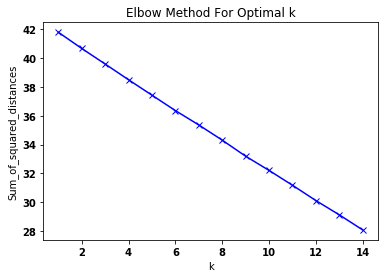

In [299]:
font = {'weight' : 'bold',
        'size'   : 10}

plt.rc('font', **font)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [300]:
num_clusters = 6

km = KMeans(n_clusters=num_clusters)

km.fit(tfidf_matrix)
clusters = km.labels_.tolist()
centers = km.cluster_centers_
print(f"the cluster centers are {centers}")

joblib.dump(km,  'doc_cluster_best_K.pkl')

the cluster centers are [[0.         0.         0.         ... 0.         0.01327738 0.        ]
 [0.         0.         0.02980581 ... 0.         0.         0.02991338]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.03391081 0.         0.03776448]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.03738272 0.03738272 0.         ... 0.         0.         0.        ]]


['doc_cluster_best_K.pkl']

In [301]:
print(km.cluster_centers_)
print(km.cluster_centers_.shape)

[[0.         0.         0.         ... 0.         0.01327738 0.        ]
 [0.         0.         0.02980581 ... 0.         0.         0.02991338]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.03391081 0.         0.03776448]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.03738272 0.03738272 0.         ... 0.         0.         0.        ]]
(6, 1126)


In [302]:
km.cluster_centers_.argsort()

array([[   0,  661,  662, ...,  443,  423,  810],
       [   0,  713,  714, ...,  145,  860,  590],
       [   0,  682,  683, ...,  227,  688, 1096],
       [   0,  722,  723, ...,  908,   17,  663],
       [   0,  729,  730, ..., 1116, 1117,  700],
       [ 562,  710,  711, ...,  758,   86, 1102]], dtype=int64)

In [303]:
## Reversing the list so that index of max element is in 0th index
km.cluster_centers_.argsort()[:,::-1]

array([[ 810,  423,  443, ...,  662,  661,    0],
       [ 590,  860,  145, ...,  714,  713,    0],
       [1096,  688,  227, ...,  683,  682,    0],
       [ 663,   17,  908, ...,  723,  722,    0],
       [ 700, 1117, 1116, ...,  730,  729,    0],
       [1102,   86,  758, ...,  711,  710,  562]], dtype=int64)

In [304]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 
for i in range(num_clusters):
    print("\n")
    print("Top words in Cluster-%d :" % i, end='')
    print("\n")
    for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
        print('%s' % terms[ind].split(' '), end=',')

Top terms per cluster:


Top words in Cluster-0 :

['relationship'],['future'],['great'],['threat'],['kind'],['family'],

Top words in Cluster-1 :

['life'],['scientists'],['captain'],['pursued'],['team', 'scientists'],['prince'],

Top words in Cluster-2 :

['work'],['new'],['criminal'],['game'],['powerful'],['world'],

Top words in Cluster-3 :

['murder'],['agent'],['solve'],['investigate', 'murder'],['investigate'],['blade', 'runner'],

Top words in Cluster-4 :

['old'],['year', 'old'],['year'],['seventeen', 'year'],['seventeen'],['comes'],

Top words in Cluster-5 :

['world'],['battle'],['powers'],['british'],['empire'],['allied'],

In [305]:
data['cluster_group'] = clusters
pd.DataFrame(data).head(6)

,index,movie,year,imdb,metascore,votes,Movie_Desc,word_count,only_tokens,all_tokens,cluster_group
0,0,Logan,(2017),8.1,77,575788,in a future where mutants are nearly extinct a...,38,future mutants nearly extinct elderly weary lo...,in a future where mutants are nearly extinct a...,1
1,1,Thor: Ragnarok,(2017),7.9,74,507058,thor chris hemsworth is imprisoned on the plan...,39,thor chris hemsworth imprisoned planet sakaar ...,thor chris hemsworth is imprisoned on the plan...,2
2,2,Guardians of the Galaxy Vol. 2,(2017),7.6,67,502008,the guardians struggle to keep together as a t...,30,guardians struggle team dealing personal famil...,the guardians struggle to keep together as a t...,0
3,3,Wonder Woman,(2017),7.4,76,499708,when a pilot crashes and tells of conflict in ...,32,pilot crashes tells conflict outside world dia...,when a pilot crashes and tells of conflict in ...,5
4,4,Dunkirk,(2017),7.9,94,479558,allied soldiers from belgium the british empir...,26,allied soldiers belgium british empire france ...,allied soldiers from belgium the british empir...,5
5,5,Star Wars: Episode VIII - The Last Jedi,(2017),7.1,85,474449,rey develops her newly discovered abilities wi...,32,rey develops newly discovered abilities guidan...,rey develops her newly discovered abilities wi...,5


In [161]:
all_vocab_frame = pd.DataFrame({'words': allwords_tokenized}, index = allwords_tokenized)
print ('there are ' + str(all_vocab_frame.shape[0]) + ' items in all_vocab_frame')

vocab_frame = pd.DataFrame({'words': words_tokenized}, index = words_tokenized)
print ('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')

there are 29 items in all_vocab_frame
there are 18 items in vocab_frame


In [162]:
values, counts = np.unique(vocab_frame, return_counts=True)
all_values, all_counts = np.unique(all_vocab_frame, return_counts=True)

In [163]:
sorted_indices = np.argsort(-counts)
print(sorted_indices)
all_sorted_indices = np.argsort(-all_counts)
print(all_sorted_indices)

[ 0 15 14 13 12 11 10  9  8  7  6  5  4  3  2  1 16 17]
[ 0  1 23 22 21 20 19 18 17 16 15 14 13 12 11 10  9  8  7  6  5  4  3  2
 24 25]


In [164]:
values = values[sorted_indices]
counts = counts[sorted_indices]

all_values = all_values[all_sorted_indices]
all_counts = all_counts[all_sorted_indices]

Importing the packages required for plotting 

In [165]:
import matplotlib.pyplot as plt
%matplotlib inline

Checking the Words Count : 

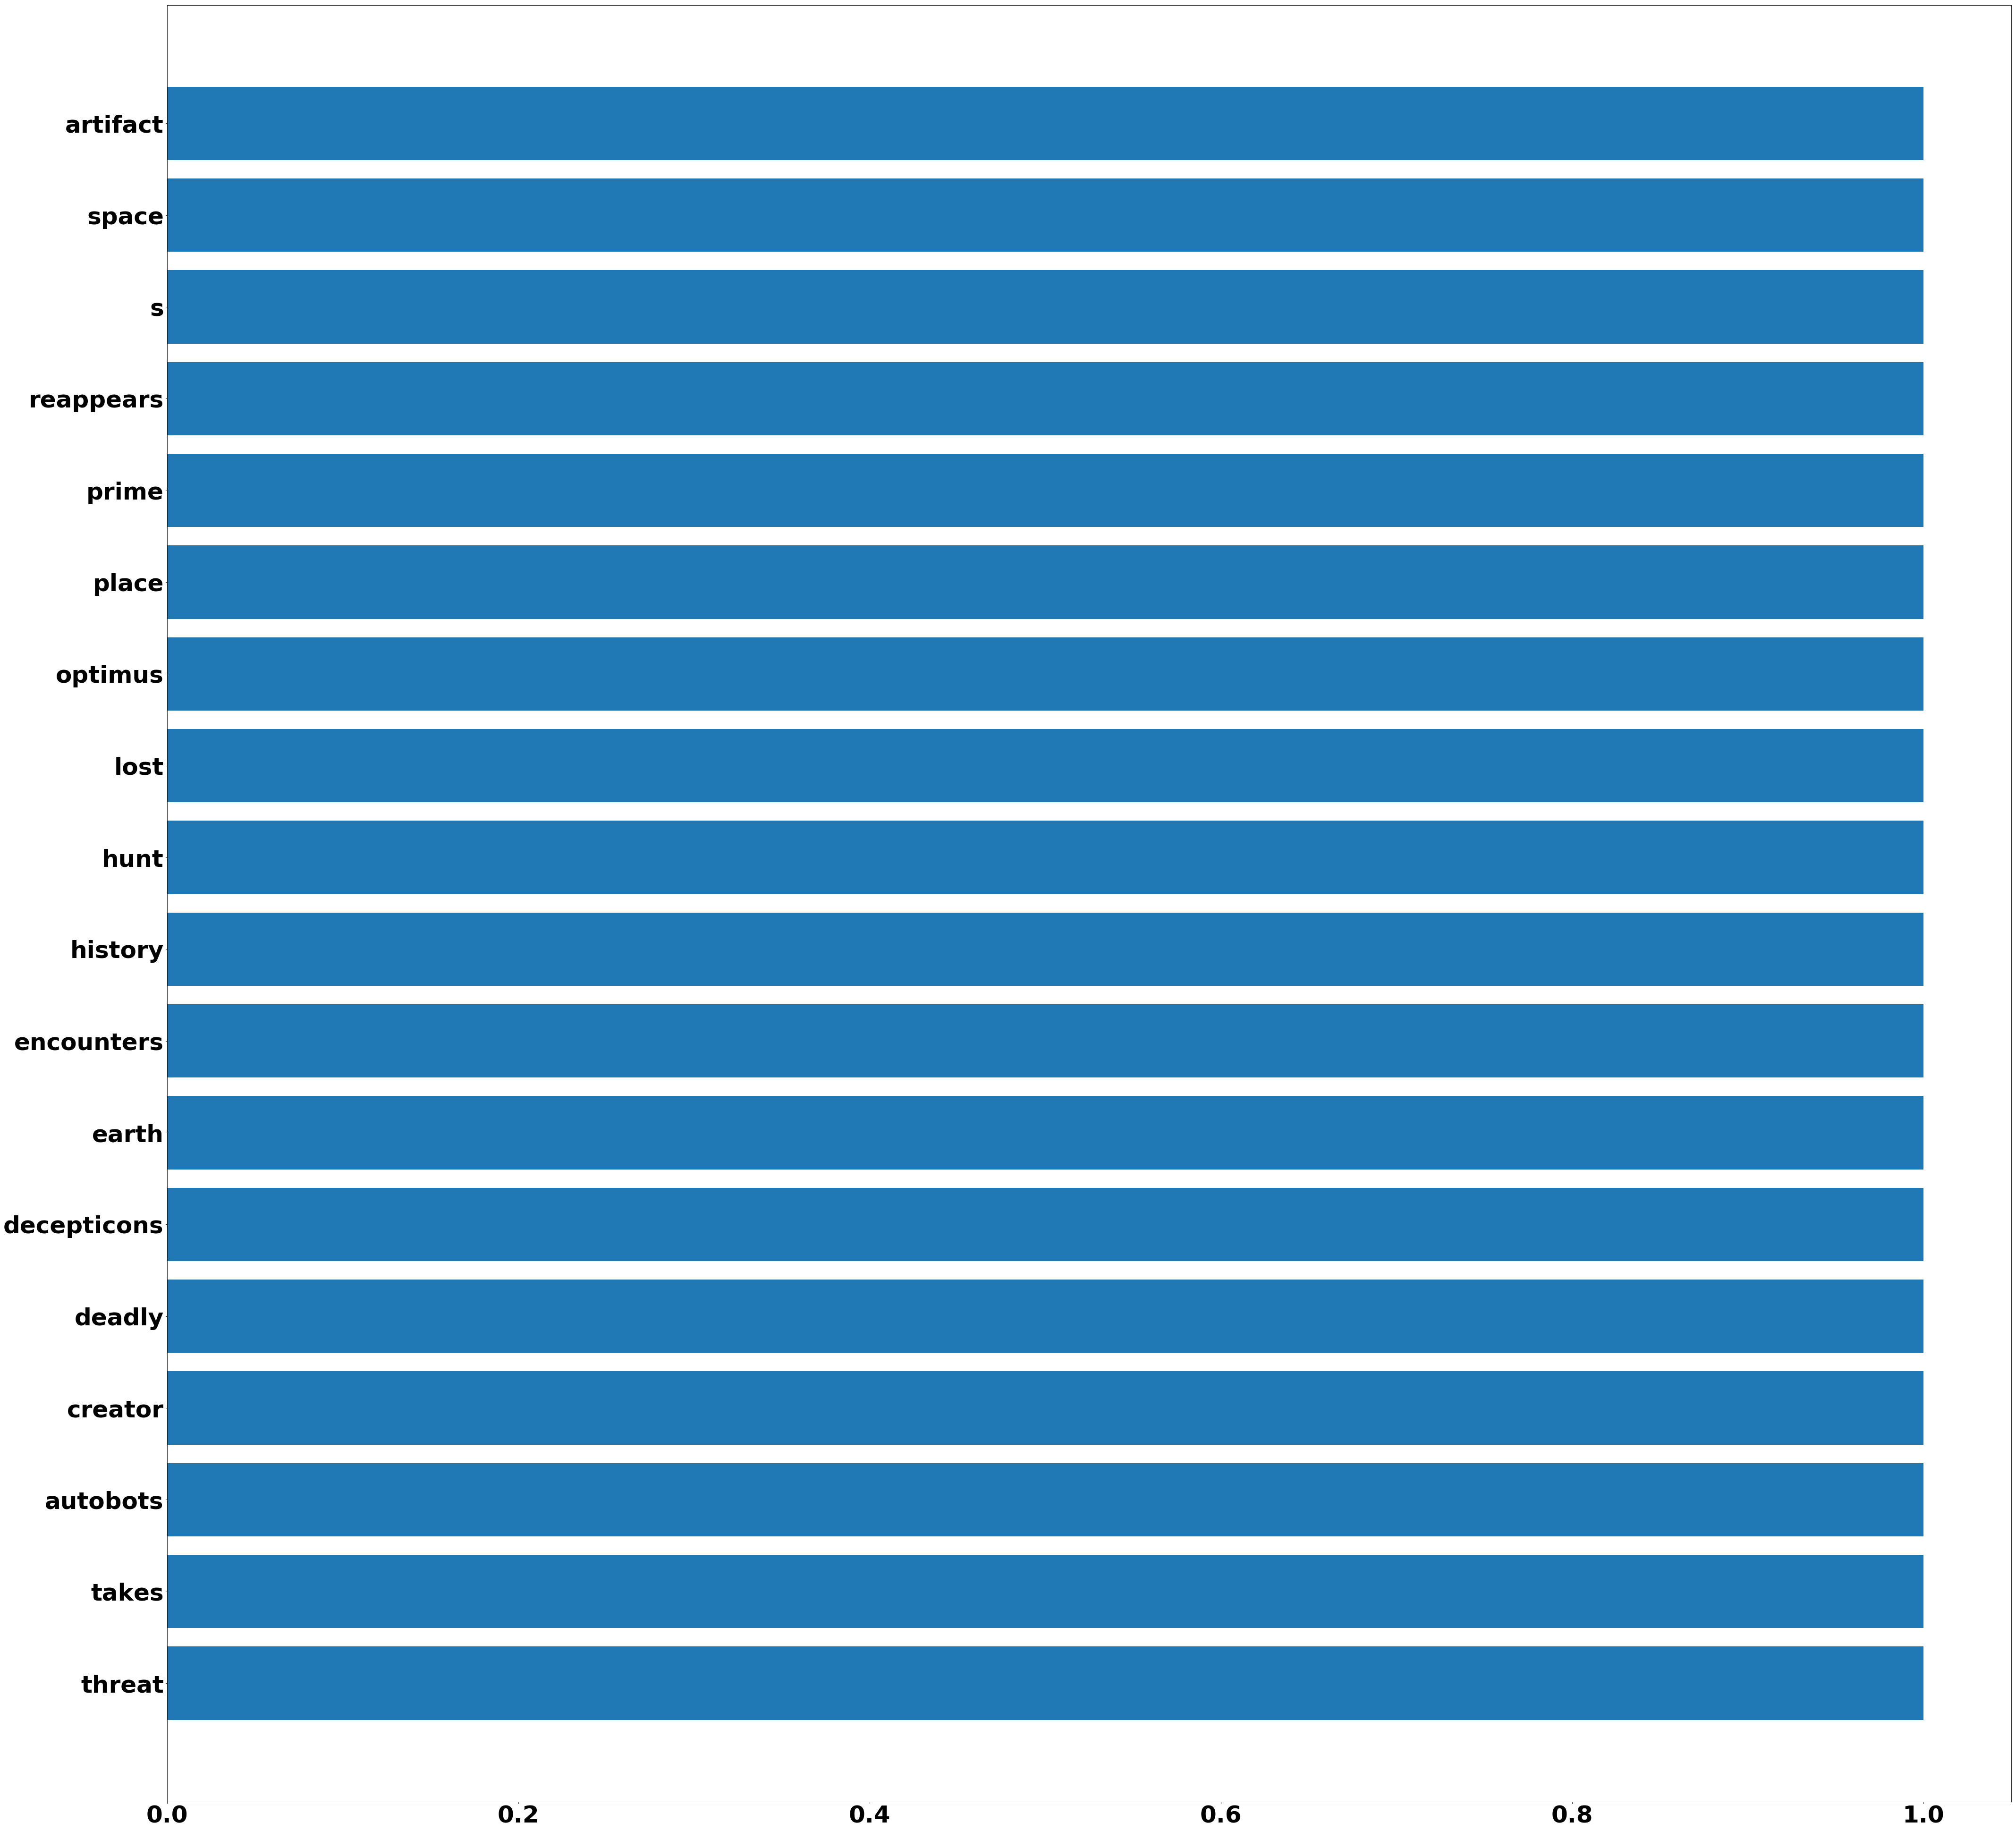

In [166]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 50}

plt.rc('font', **font)
fig = plt.figure(figsize=(70,70))
plt.barh(values[:75], counts[:75])
plt.gca().invert_yaxis()
plt.show()

Checking the Word_Count: 

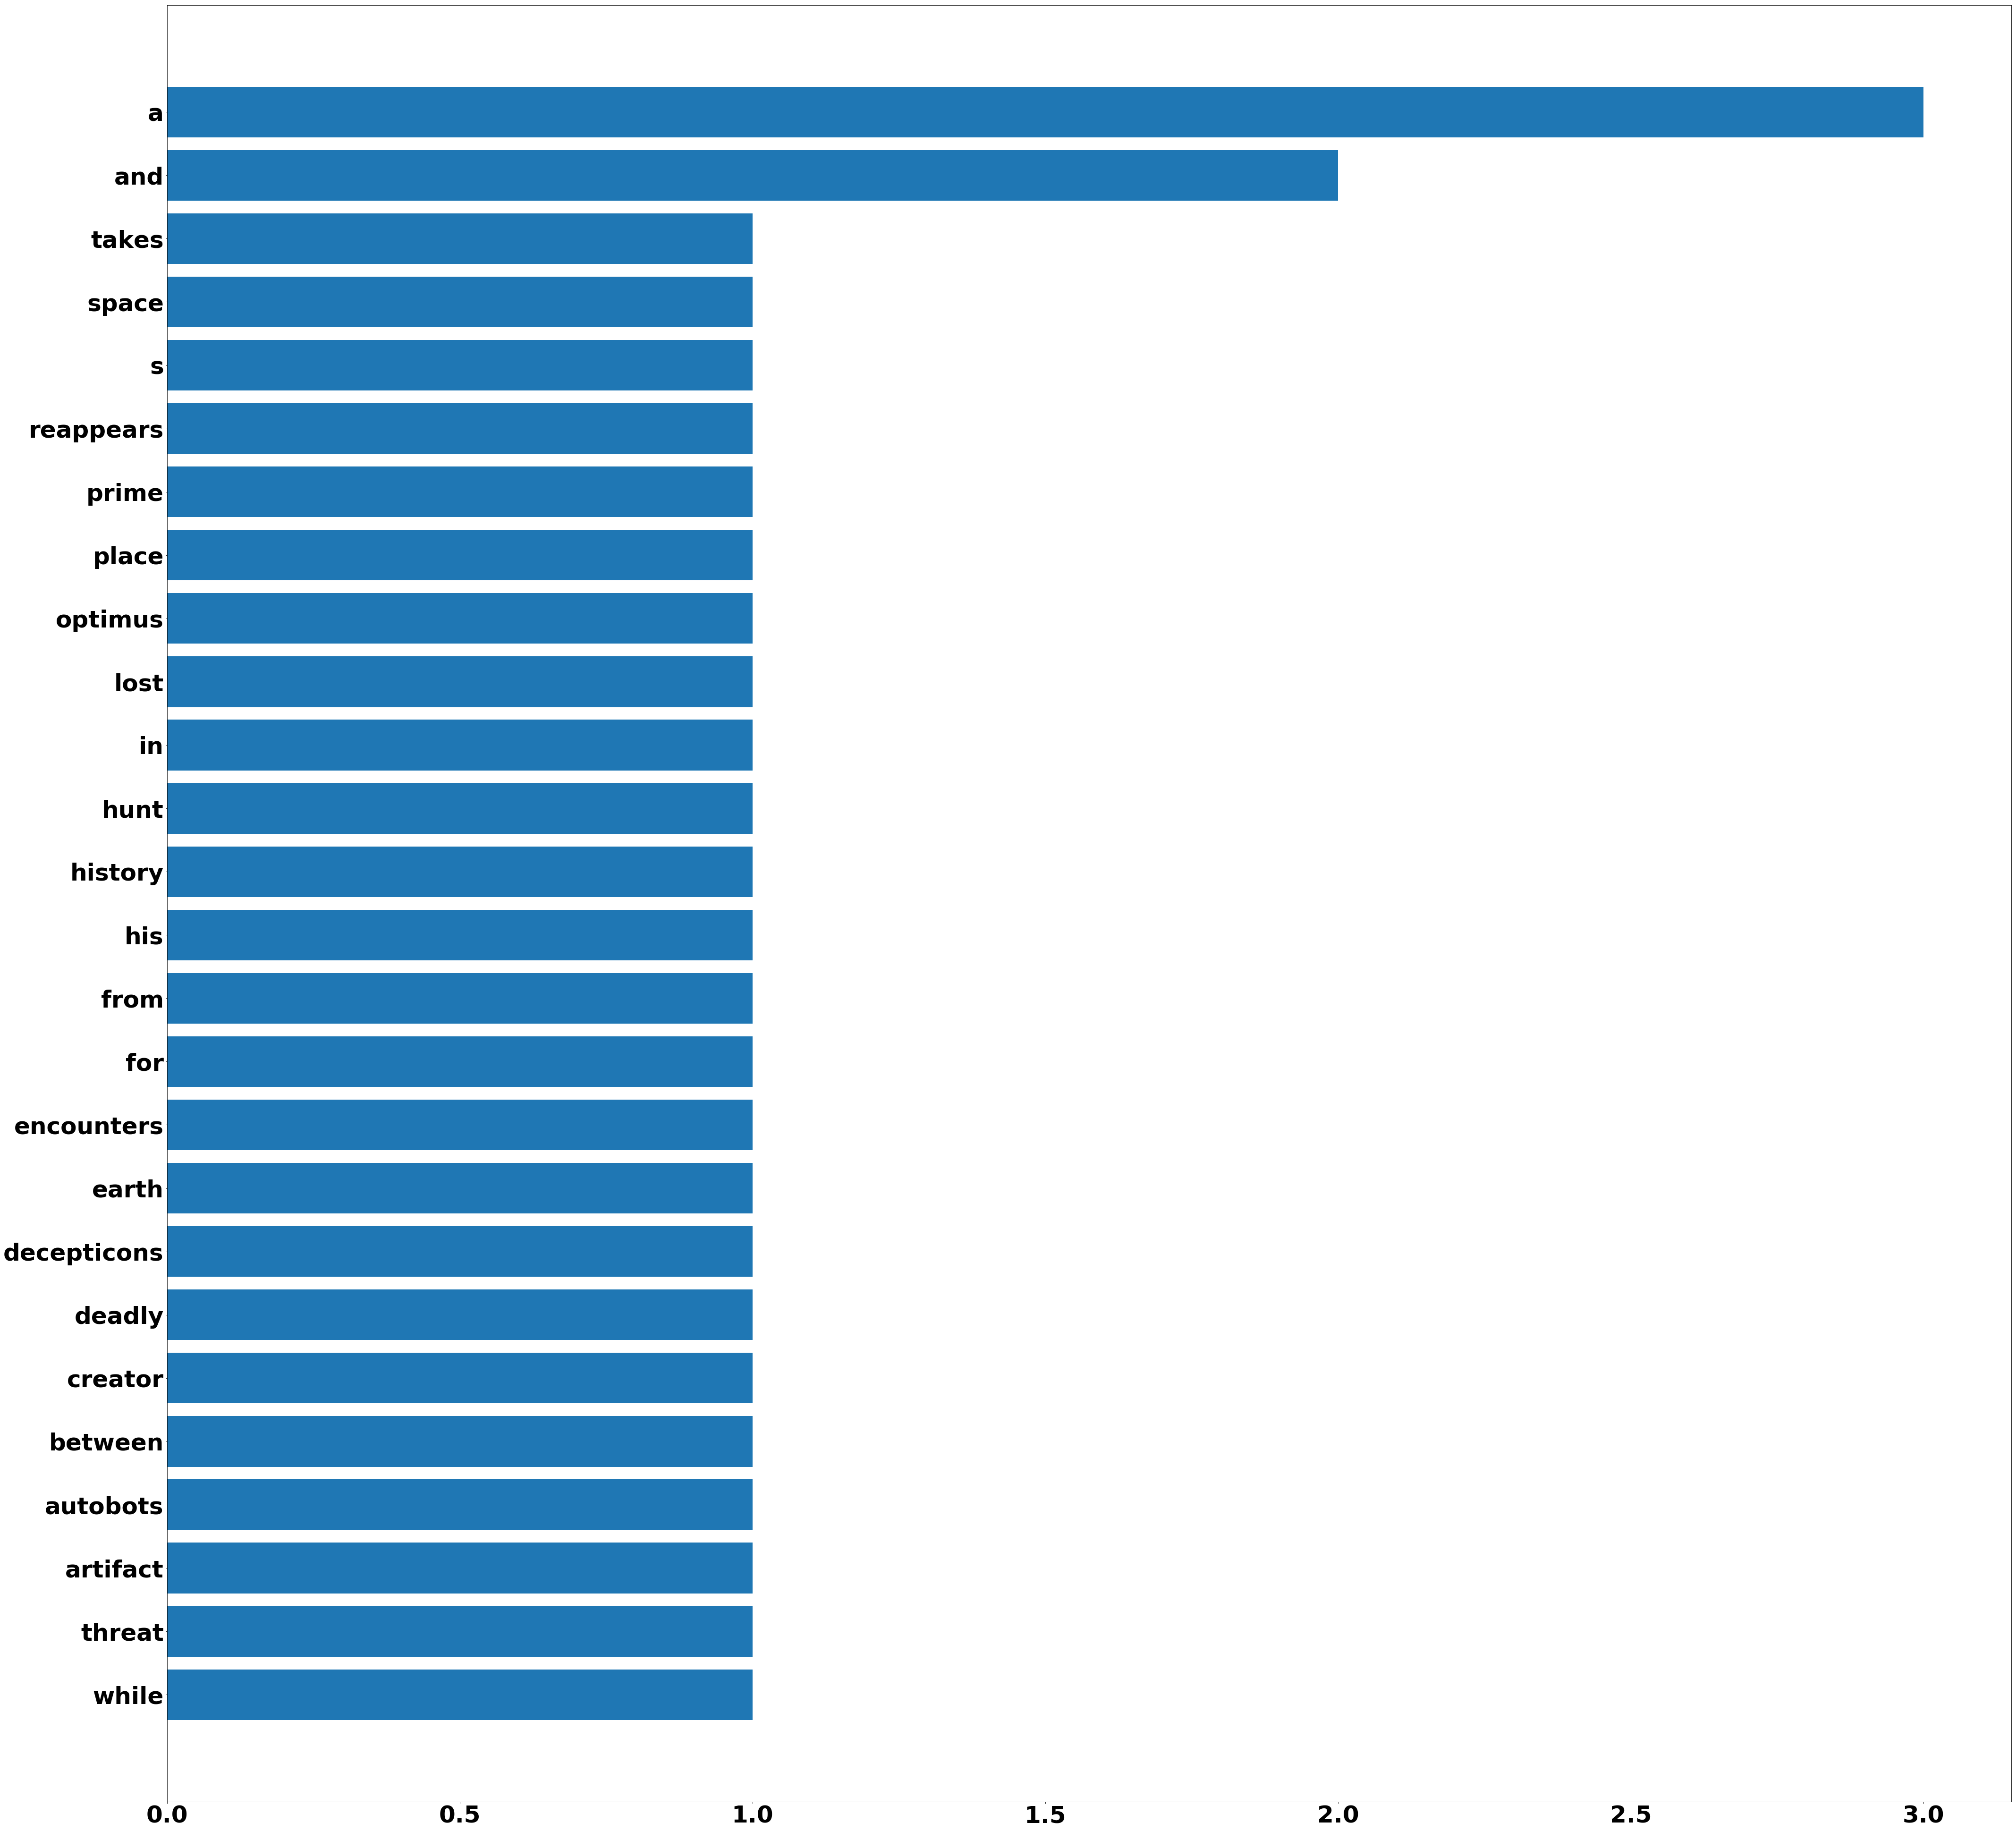

In [167]:
plt.rc('font', **font)
fig = plt.figure(figsize=(70,70))
plt.barh(all_values[:75], all_counts[:75])
plt.gca().invert_yaxis()
plt.show()

In [ ]:
from requests import get
url1 = 'https://www.imdb.com/title/tt3315342/reviews?ref_=tt_urv'
response1 = get(url1)

from bs4 import BeautifulSoup
html_soup1 = BeautifulSoup(response1.text, 'html.parser')
type(html_soup1)

In [ ]:
movie_containers1 = html_soup1.find_all('section', class_ = 'lister-list')
print(type(movie_containers1))
print(len(movie_containers1))

#movie_cont_2 = movie_containers1.find('div', class_= 'lister-item mode-detail imdb-user-review  with-spoiler')